wost_mse:  [0.017848547469372204, 0.008995519562244024, 0.004543697410144678, 0.002283673695954756, 0.0011327690787906696, 0.0005595439209257394, 0.00028503558093678755, 0.00014481496804066792, 7.169221206941615e-05]
File 2d_output_24576bvc.csv not found
File 2d_output_12288bvc.csv not found
File 2d_output_6144bvc.csv not found
File 2d_output_4096bvc.csv not found
bvc_mse:  [0.1587745951863932, 7.169221206941615e-05, 3.664312138832195e-05]
rws_mse:  [3.664312138832195e-05, 0.0002833984719237301, 0.000314029616298685, 0.00010939059880872439, 4.839519306825984e-05, 3.4551244662356653e-05]
log_wost_mse:  [-1.748397121383964, -2.0459737476603834, -2.342590598397414, -2.6413659504130953, -2.9458586144334977, -3.252165818220446, -3.5451009237108058, -3.839186547244476, -4.144528019213352]
log_bvc_mse:  [-0.7992189858698815, -4.144528019213352, -4.436007538716386]
log_rws_mse:  [-4.436007538716386, -3.5476024957853864, -3.5030293914536825, -3.961020000314598, -4.315197773223449, -4.4615363031

ValueError: x and y must have same first dimension, but have shapes (7,) and (3,)

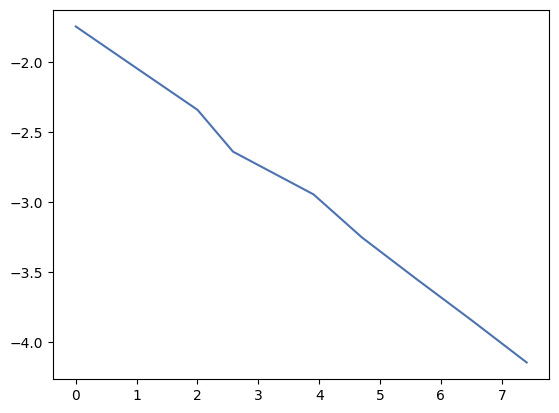

In [2]:
import os
gt_path = "ly.csv"
# gt_path = "2d_output_24576bvc.csv"
gt_time = {"1024": 170, "512": 90, "256": 48, "128": 26, "64":15, "32": 6,"16": 4, "8":2, "4": 1}
gt_time_list = [gt_time[str(2**i)] for i in range(2, 11)]
with open(gt_path, 'r') as f:
    gt_data = f.readlines()

wost_test_paths = ["2d_output_nwalks=4wost.csv", "2d_output_nwalks=8wost.csv", "2d_output_nwalks=16wost.csv", "2d_output_nwalks=32wost.csv", "2d_output_nwalks=64wost.csv", "2d_output_nwalks=128wost.csv", "2d_output_nwalks=256wost.csv", "2d_output_nwalks=512wost.csv", "2d_output_nwalks=1024wost.csv"]

# gt_bvc_path = "2d_output_24576bvc.csv"
gt_bvc_path = "ly.csv"
bvc_test_paths = ["2d_output_24576bvc.csv","2d_output_12288bvc.csv", "2d_output_6144bvc.csv", "2d_output_4096bvc.csv", "2d_output_2048bvc.csv", "2d_output_1024bvc.csv", "2d_output_32bvc.csv"]

gt_rws_path = "2d_output_24576rws.csv"
rws_test_paths = ["2d_output_1024rws.csv", "2d_output_2048rws.csv", "2d_output_4096rws.csv", "2d_output_6144rws.csv", "2d_output_12288rws.csv", "2d_output_24576rws.csv"]

# for each test path, calculate mse
    # col 1: x
    # col 2: y
    # col 3: z
    # col 4: solution
wost_mse = []
bvc_mse = []
bvc_time = {"24576": 113, "12288": 55,"6114": 26, "4096": 11, "2048": 4, "1024": 2, "32": 0}
bvc_time_list = [bvc_time[key] for key in bvc_time.keys()]
bvc_time_list.sort()

rws_mse = []
rws_time = {"24576": 85,"12288": 44,"6144": 23, "4096": 14, "2048": 8, "1024": 3}
rws_time_list = [rws_time[key] for key in rws_time.keys()]
rws_time_list.sort()

for test_path in wost_test_paths:
    mse = 0
    try:
        with open(test_path, 'r') as f:
            test_data = f.readlines()
    except FileNotFoundError:
        print(f"File {test_path} not found")
        continue
    for i in range(len(gt_data)-1):
    # for i in range(len(gt_data)):
        gt_x, gt_y, gt_sol = gt_data[i+1].split(',')
        # gt_x, gt_y, _, gt_sol = gt_data[i].split(',')
        test_x, test_y, test_z, test_sol = test_data[i].split(',')
        assert((gt_x == test_x) and (gt_y == test_y)), f"line {i} in gt_data[{i}] and test_data[{i}] do not match"
        mse += (float(gt_sol) - float(test_sol))**2
    mse /= len(gt_data)
    wost_mse.append(mse)

print("wost_mse: ", wost_mse)


with open(gt_bvc_path, 'r') as f:
    bvc_gt_data = f.readlines()

for test_path in bvc_test_paths:
    mse = 0
    try:
        with open(test_path, 'r') as f:
            test_data = f.readlines()
    except FileNotFoundError:
        print(f"File {test_path} not found")
        continue
    for i in range(len(gt_data)-1):
        gt_x, gt_y, gt_sol = gt_data[i+1].split(',')
    # for i in range(len(bvc_gt_data)):
        # gt_x, gt_y, _, gt_sol = bvc_gt_data[i].split(',')
        test_x, test_y, test_z, test_sol = test_data[i].split(',')
        assert((gt_x == test_x) and (gt_y == test_y)), f"line {i} in gt_data[{i}] = {gt_x} and test_data[{i}] = {test_x} do not match"
        mse += (float(gt_sol) - float(test_sol))**2
    # mse /= len(gt_data)
    mse /= len(bvc_gt_data)
    bvc_mse.append(mse)
bvc_mse.reverse()

for test_path in rws_test_paths:
    mse = 0
    try:
        with open(test_path, 'r') as f:
            test_data = f.readlines()
    except FileNotFoundError:
        print(f"File {test_path} not found")
        continue
    for i in range(len(gt_data)-1):
    # for i in range(len(gt_data)):
        gt_x, gt_y, gt_sol = gt_data[i+1].split(',')
        # gt_x, gt_y, _, gt_sol = gt_data[i].split(',')
        test_x, test_y, test_z, test_sol = test_data[i].split(',')
        assert((gt_x == test_x) and (gt_y == test_y))
        mse += (float(gt_sol) - float(test_sol))**2
    mse /= len(gt_data)
    rws_mse.append(mse)

print("bvc_mse: ", bvc_mse)
print("rws_mse: ", rws_mse)

# 绘制三条曲线图 横坐标是时间，纵坐标是log(MSE)
import matplotlib.pyplot as plt
import math
log_wost_mse = [math.log(mse, 10) if mse > 0 else -4 for mse in wost_mse]
log_bvc_mse = [math.log(mse, 10) if mse > 0 else -4 for mse in bvc_mse]
log_rws_mse = [math.log(mse, 10) if mse > 0 else -4 for mse in rws_mse]

print("log_wost_mse: ", log_wost_mse)
print("log_bvc_mse: ", log_bvc_mse)
print("log_rws_mse: ", log_rws_mse)

print("gt_time_list: ", gt_time_list)
print("bvc_time_list: ", bvc_time_list)
print("rws_time_list: ", rws_time_list)

log_wost_time = [math.log(t, 2) for t in gt_time_list]
log_bvc_time = [math.log(t, 2) if t > 0 else 0 for t in bvc_time_list]
log_rws_time = [math.log(t, 2) for t in rws_time_list]

plt.plot(log_wost_time, log_wost_mse, color='#4c72b0', label="Wost")
plt.plot(log_bvc_time, log_bvc_mse, color='#c44e52', label="BVC")
plt.plot(log_rws_time, log_rws_mse, color='#55a868', label="RWS")
plt.xlabel("log(Time) (s)" , fontsize=15)
plt.ylabel("log(MSE)", fontsize=15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.title("log(MSE) vs log(Time)", fontsize=16)
# plt.show()
plt.savefig("mse_vs_time.png", dpi=200)

In [ ]:
def plot_results(data, output_file='mse_comparison.png'):
    """绘制对比图表"""
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 7))
    # 绘制 mean_value 曲线
    if data['mean_value'][0]:
        plt.plot(data['mean_value'][0], data['mean_value'][1], 
            marker='o', label='mean_value', color='#4c72b0', linewidth=2)

    # 绘制 mean_value_w 曲线
    if data['mean_value_w'][0]:
        plt.plot(data['mean_value_w'][0], data['mean_value_w'][1], 
            marker='s', label='mean_value_w', color='#c44e52', linewidth=2)

    # 设置图表样式
    plt.title('MSE Comparison Between mean_value and mean_value_w Methods', fontsize=16)
    plt.xlabel('Number of Steps (log scale)', fontsize=14)
    plt.ylabel('Mean Squared Error (MSE)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)

    # 设置对数坐标
    plt.xscale('log', base=2)
    plt.yscale('log', base=2)
    plt.xticks(data['mean_value'][0] if data['mean_value'][0] else data['mean_value_w'][0], rotation=45)

    # 自动调整布局
    plt.tight_layout()

    # 保存图表
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"图表已保存至: {output_file}")
